In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


BFS starting from vertex 2: [2, 1, 3]


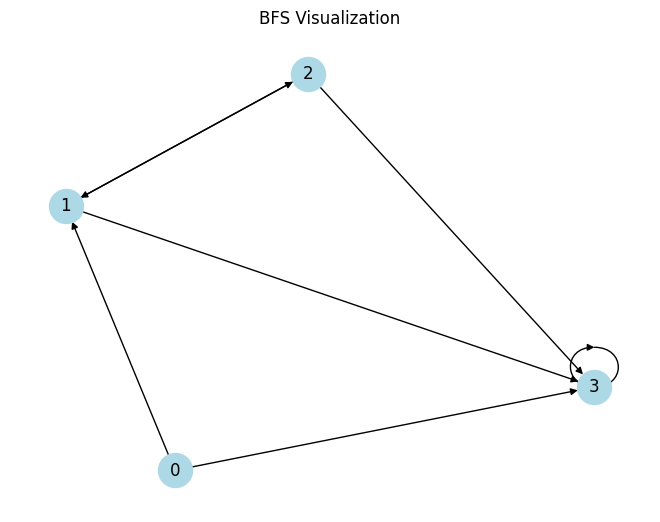

In [ ]:
# First, you need to install NetworkX and Matplotlib using pip if you haven't already:
# pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

def bfs(graph, start_node):
    visited = set()
    queue = [start_node]
    visited.add(start_node)
    bfs_order = [start_node]

    while queue:
        node = queue.pop(0)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                bfs_order.append(neighbor)

    return bfs_order

G = nx.DiGraph()

G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(3, 3)

start_node = 2
bfs_order = bfs(G, start_node)
print("BFS starting from vertex 2:", bfs_order)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600)
plt.title("BFS Visualization")
plt.show()

DFS starting from vertex 2:
[2, 1, 3, 4]


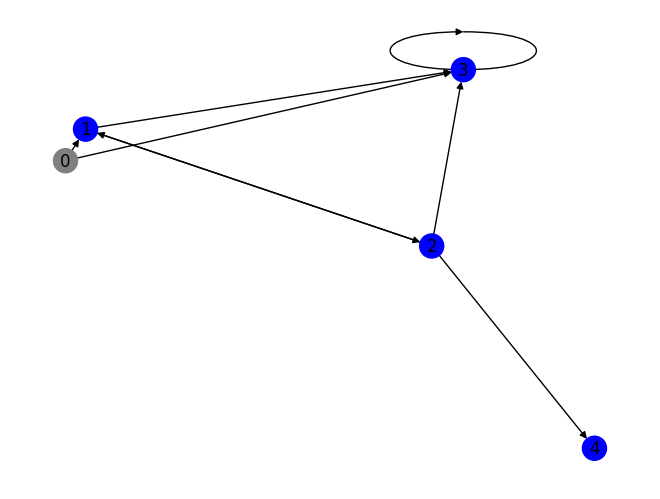

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append(v)

    def dfs(self, start):
        visited = set()
        dfs_order = []

        def dfs_recursive(node):
            visited.add(node)
            dfs_order.append(node)
            for neighbor in self.graph.get(node, []):
                if neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return dfs_order

def visualize_dfs(graph, dfs_order):
    G = nx.DiGraph()
    for node, neighbors in graph.graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes()}

    node_colors = ['blue' if node in dfs_order else 'gray' for node in G.nodes()]

    nx.draw(G, pos, labels=labels, node_color=node_colors, with_labels=True, arrows=True)
    plt.show()

# Example usage:
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 3)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 1)
g.add_edge(2, 3)
g.add_edge(2, 4)
g.add_edge(3, 3)

start_node = 2
dfs_order = g.dfs(start_node)
print("DFS starting from vertex 2:")
print(dfs_order)

visualize_dfs(g, dfs_order)

In [ ]:
import heapq

class PriorityQueue:
    def __init__(self, priorityFunction):
        self.priorityFunction = priorityFunction
        self.heap = []

    def push(self, item):
        heapq.heappush(self.heap, (self.priorityFunction(item), item))

    def pop(self):
        (_, item) = heapq.heappop(self.heap)
        return item

    def empty(self):
        return len(self.heap) == 0

class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0

    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    open_list = []
    closed_list = []

    open_list.append(start_node)

    while len(open_list) > 0:
        current_node = open_list[0]
        current_index = 0

        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        open_list.pop(current_index)
        closed_list.append(current_node)

        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            if (
                node_position[0] >= len(maze) or
                node_position[0] < 0 or
                node_position[1] >= len(maze[0]) or
                node_position[1] < 0
            ):
                continue

            if maze[node_position[0]][node_position[1]] != 0:
                continue

            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            child.g = current_node.g + 1
            child.h = (child.position[0] - end_node.position[0]) ** 2 + (child.position[1] - end_node.position[1]) ** 2
            child.f = child.g + child.h

            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            open_list.append(child)

def main():
    maze = [
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
    start = (0, 0)
    end = (7, 6)
    path = astar(maze, start, end)
    print("Path:", path)

if __name__ == "__main__":
    main()

Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


Confusion Matrix: 
 [[126  34]
 [ 59  34]]


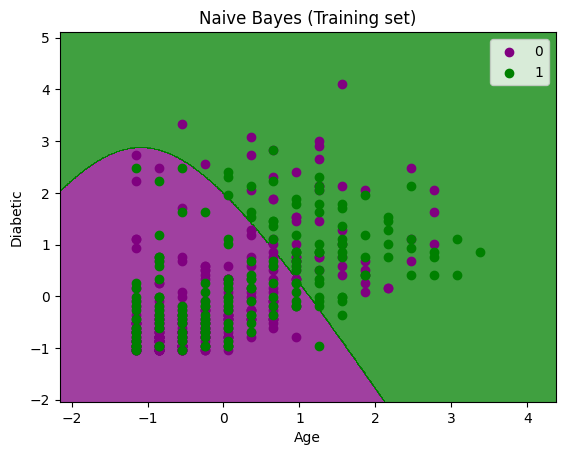

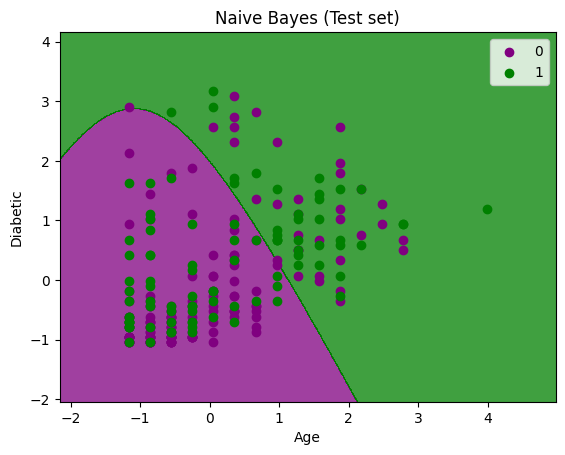

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AI ML/diabetes.csv')

X = dataset.iloc[:, [0, 7]].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Visualizing the Training set results
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['purple', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(['purple', 'green'])(i), label=j)
plt.title("Naive Bayes (Training set)")
plt.xlabel('Age')
plt.ylabel('Diabetic')
plt.legend()
plt.show()

# Visualizing the Test set results
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['purple', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(['purple', 'green'])(i), label=j)
plt.title("Naive Bayes (Test set)")
plt.xlabel('Age')
plt.ylabel('Diabetic')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Load the Heart Disease dataset from a CSV file
heart_disease = pd.read_csv('/content/drive/MyDrive/AI ML/heart.csv')

# Replace missing values with NaN using NumPy
heart_disease.replace('?', np.nan, inplace=True)

# Display sample instances from the dataset
print("Sample instances from the dataset are given below:")
print(heart_disease.head())

# Display attributes and their data types
print("\nAttributes and datatypes:")
print(heart_disease.dtypes)

# Define the structure of the Bayesian Network
model = BayesianNetwork([('age', 'trestbps'), ('chol', 'fbs'),
                        ('restecg', 'exang'), ('cp', 'heartdisease'),
                        ('heartdisease', 'thal', 'num')])  # Adjust variable names as per your dataset

print("\nLearning CPD using Maximum Likelihood Estimators")

# Fit the model to the data using Maximum Likelihood Estimation
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

print("\nInferencing with Bayesian Network:")

# Create an inference object using Variable Elimination
heart_disease_infer = VariableElimination(model)

# 1. Probability of Heart Disease given evidence - restecg
q1 = heart_disease_infer.query(variables=['heartdisease'], evidence={'restecg': 1})
print("1. Probability of Heart Disease given evidence - restecg")
print(q1)

# 2. Probability of Heart Disease given evidence - cp
q2 = heart_disease_infer.query(variables=['heartdisease'], evidence={'cp': 2})
print("\n2. Probability of Heart Disease given evidence - cp")
print(q2)

Sample instances from the dataset are given below:
   age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  thal  \
0   63       1   1       145   233    1        0      150      0   2.3   
1   67       1   4       160   286    0        1      108      1   1.5   
2   67       1   4       120   229    0        0      129      1   2.6   
3   41       0   2       130   204    0        1      172      0   1.4   
4   62       0   4       140   268    0        0      160      0   3.6   

   heartdisease  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0             3            0            6            0  
1             2            3            3            2  
2             2            2            7            1  
3             1            0            3            0  
4             3            2            3            3  

Attributes and datatypes:
age               int64
gender            int64
cp                int64
trestbps          int64
chol              int64
fbs            

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00


Converged Log-Likelihood Value: -1.4985672470486968
Number of Iterations to Converge: 8


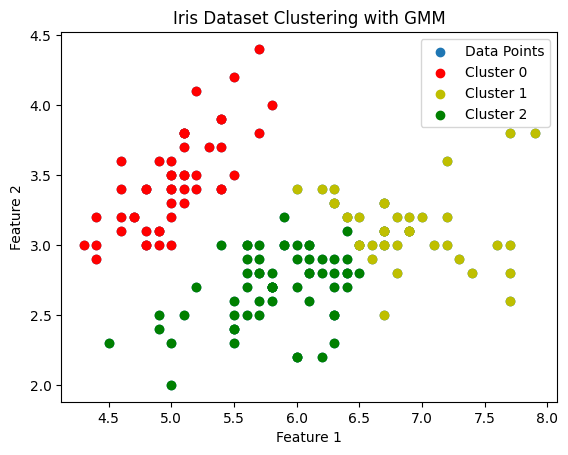

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()

# Select the first two columns (features) of the dataset
X = iris.data[:, :2]

# Create a DataFrame from the selected features
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Plot the data
plt.scatter(df['Feature 1'], df['Feature 2'], label='Data Points')

# Initialize a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3)

# Fit the GMM model to the dataset
gmm.fit(df)

# Assign a cluster label to each sample
labels = gmm.predict(df)

# Add the labels to the DataFrame
df['Labels'] = labels

# Separate the data into clusters based on the labels
cluster_0 = df[df['Labels'] == 0]
cluster_1 = df[df['Labels'] == 1]
cluster_2 = df[df['Labels'] == 2]

# Plot the three clusters with different colors
plt.scatter(cluster_0['Feature 1'], cluster_0['Feature 2'], c='r', label='Cluster 0')
plt.scatter(cluster_1['Feature 1'], cluster_1['Feature 2'], c='y', label='Cluster 1')
plt.scatter(cluster_2['Feature 1'], cluster_2['Feature 2'], c='g', label='Cluster 2')

# Print the converged log-likelihood value
print("Converged Log-Likelihood Value:", gmm.lower_bound_)

# Print the number of iterations needed for convergence
print("Number of Iterations to Converge:", gmm.n_iter_)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset Clustering with GMM')
plt.legend()

# Display the plot
plt.show()

Accuracy: 0.80


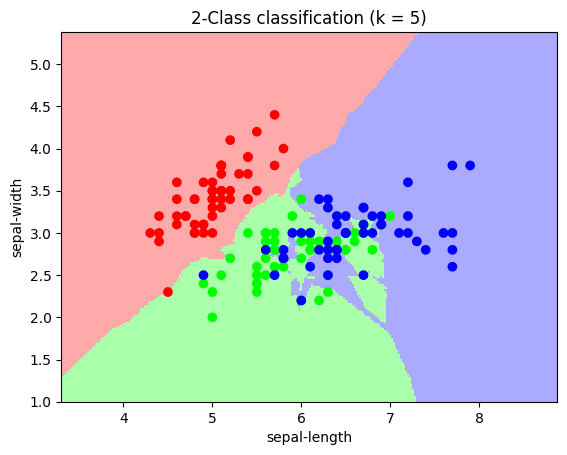

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02  # Step size in the mesh

# Calculate min, max, and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class using data and KNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title(f"2-Class classification (k = {n_neighbors})")
plt.xlabel("sepal-length")
plt.ylabel("sepal-width")
plt.show()

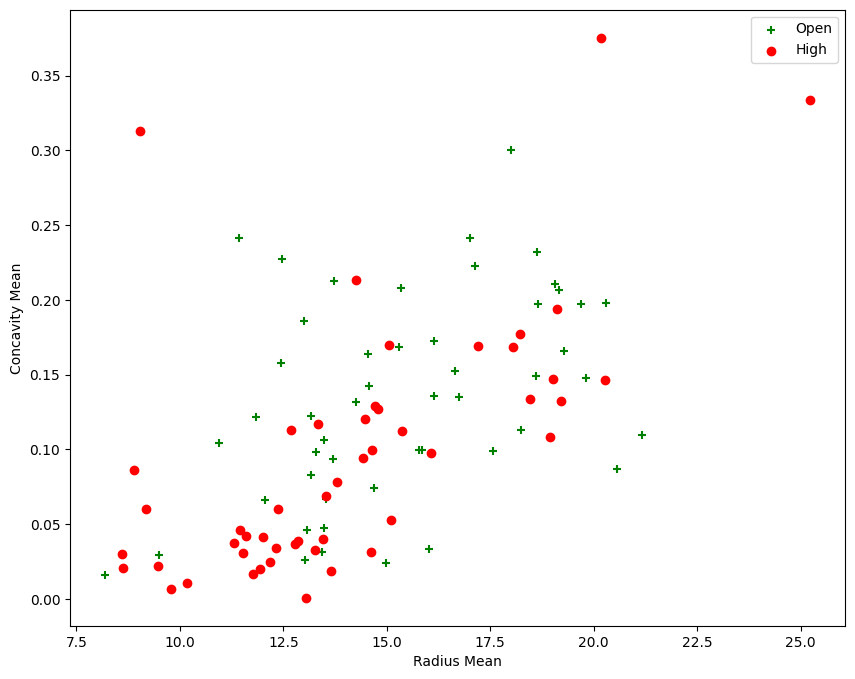

Epoch 0: Loss = [0.02037789]
Epoch 1: Loss = [0.00025119]
Epoch 2: Loss = [-0.00858347]
Epoch 3: Loss = [-0.00850219]
Epoch 4: Loss = [-0.00841737]
Epoch 5: Loss = [-0.00826688]
Epoch 6: Loss = [-0.00817165]
Epoch 7: Loss = [-0.00802702]
Epoch 8: Loss = [-0.00792253]
Epoch 9: Loss = [-0.00804495]
Epoch 10: Loss = [-0.00615539]
Epoch 11: Loss = [-0.00791063]
Epoch 12: Loss = [-0.0077166]
Epoch 13: Loss = [-0.00743084]
Epoch 14: Loss = [-0.00731073]
Epoch 15: Loss = [-0.00718708]
Epoch 16: Loss = [-0.00699425]
Epoch 17: Loss = [-0.00704619]
Epoch 18: Loss = [-0.00512569]
Epoch 19: Loss = [-0.00684113]
Epoch 20: Loss = [-0.00663483]
Epoch 21: Loss = [-0.00631937]
Epoch 22: Loss = [-0.00617105]
Epoch 23: Loss = [-0.0060192]
Epoch 24: Loss = [-0.00586382]
Epoch 25: Loss = [-0.00582407]
Epoch 26: Loss = [-0.00402021]
Epoch 27: Loss = [-0.00556822]
Epoch 28: Loss = [-0.00533655]
Epoch 29: Loss = [-0.00499182]
Epoch 30: Loss = [-0.00481531]
Epoch 31: Loss = [-0.00480082]
Epoch 32: Loss = [-0.0

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI ML/breast_cancer.csv')  # Fixed path by using r''

# Extract the feature values
X = df[['radius_mean', 'concavity_mean']].values

# Create separate datasets for open and high values
open_x = X[:50, 0]
open_y = X[:50, 1]
high_x = X[50:100, 0]
high_y = X[50:100, 1]

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(open_x, open_y, marker='+', color='green', label='Open')
plt.scatter(high_x, high_y, marker='o', color='red', label='High')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Mean')
plt.legend()
plt.show()

# Extract target values (diagnosis) and convert to -1 or 1
Y = df['diagnosis'].map({'M': -1, 'B': 1}).values

# Drop diagnosis column from the dataframe
df = df.drop(['diagnosis'], axis=1)

# Shuffle the data
X, Y = shuffle(X, Y)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Initialize parameters
w1 = np.zeros(1)
w2 = np.zeros(1)
epochs = 10000
alpha = 0.0001

# Training the SVM using gradient descent
for epoch in range(epochs):
    errors = []
    for i in range(X_train.shape[0]):
        x = X_train[i]
        y = Y_train[i]
        condition = y * (w1 * x[0] + w2 * x[1])
        if condition >= 1:
            w1 = w1 - alpha * (2 * 1 / epochs * w1)
            w2 = w2 - alpha * (2 * 1 / epochs * w2)
        else:
            w1 = w1 + alpha * (x[0] * y - 2 * 1 / epochs * w1)
            w2 = w2 + alpha * (x[1] * y - 2 * 1 / epochs * w2)
            errors.append(condition)

    # Calculate the hinge loss
    loss = 0.5 * (w1 ** 2 + w2 ** 2) + np.mean(errors)
    print(f'Epoch {epoch}: Loss = {loss}')

# Clip the weights
index = list(range(10, X_train.shape[0]))
w1 = np.delete(w1, index)
w2 = np.delete(w2, index)

# Extract the test data features
test_fl = X_test[:, 0].reshape(-1, 1)
test_f2 = X_test[:, 1].reshape(-1, 1)

# Predict
y_pred = w1 * test_fl + w2 * test_f2
predictions = np.where(y_pred > 1, 1, -1)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (update the file path with double backslashes)
data = pd.read_csv('/content/drive/MyDrive/AI ML/diabetes-1.csv')

# Check the shape and first few rows of the dataset
print(data.shape)
print(data.head())

# Separate features (X) and target variable (Y)
X = data.drop(['SkinThickness', 'Outcome'], axis=1)
Y = data['Outcome']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
clf = LogisticRegression()

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Import the accuracy metric
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))


(767, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.7857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Dataset
   AA  A2  A3  A4  A5  A6  LABEL
0   1   2   3   4   5   6      0
1   2   3   4   5   6   7      1
2   3   4   5   6   7   8      0
3   4   5   6   7   8   9      1
4   5   6   7   8   9  10      0
Test Dataset
   AA  A2  A3  A4  A5  A6  LABEL
0   2   3   4   5   6   7      0
1   4   5   6   7   8   9      1
2   6   7   8   9  10  11      0
3   8   9  10  11  12  13      1
4  10  11  12  13  14  15      0
Predicted Labels:
[0 0]
Decision Tree's Accuracy: 0.5
Criterion=gini, Accuracy: 0.5
Criterion=entropy, Accuracy: 0.5


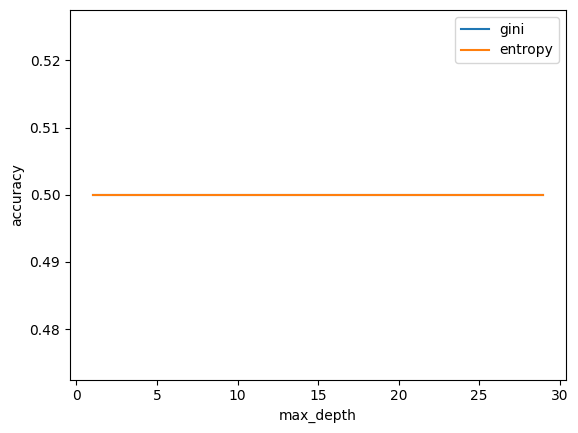

Accuracy after reducing depth and using Entropy: 0.5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
import matplotlib.pyplot as plt

# Read and print the training dataset
traindatainput = pd.read_csv('/content/drive/MyDrive/AI ML/monks2_train.csv', delimiter=",")
print("Training Dataset")
print(traindatainput)

# Read and print the test dataset
testdatainput = pd.read_csv('/content/drive/MyDrive/AI ML/monks2_test.csv', delimiter=",")
print("Test Dataset")
print(testdatainput)

# Define the feature columns and target column
X_train = traindatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_train = traindatainput["LABEL"]
X_test = testdatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_test = testdatainput["LABEL"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=3)

# Create a Decision Tree with criterion 'entropy' and max_depth 4
monksTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
monksTree.fit(X_train, Y_train)
predicted = monksTree.predict(X_test)
print("Predicted Labels:")
print(predicted)

# Find and print the accuracy of the decision tree model
accuracy = accuracy_score(Y_test, predicted)
print("Decision Tree's Accuracy:", accuracy)

# Visualize the decision tree using Graphviz
dot_data = StringIO()
export_graphviz(monksTree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['al', 'a2', 'a3', 'a4', 'a5', 'a6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

# Try different criteria and check accuracy
monksTree = DecisionTreeClassifier(criterion='gini')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_gini = accuracy_score(Y_test, pred)
print('Criterion=gini, Accuracy:', accuracy_gini)

monksTree = DecisionTreeClassifier(criterion='entropy')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_entropy = accuracy_score(Y_test, pred)
print('Criterion=entropy, Accuracy:', accuracy_entropy)

# Check if pruning can improve results
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 30):
    monksTree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, pred))

    monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))

    max_depth.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini), 'acc_entropy': pd.Series(acc_entropy), 'max_depth': pd.Series(max_depth)})

# Visualize changes in parameters
plt.plot('max_depth', 'acc_gini', data=d, label='gini')
plt.plot('max_depth', 'acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Check accuracy with a shorter tree (max depth of 7) and criterion of entropy
monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_pruned = accuracy_score(Y_test, pred)
print("Accuracy after reducing depth and using Entropy:", accuracy_pruned)

In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras

# Load and preprocess your data (replace with your data loading code)
data = pd.read_csv('/content/drive/MyDrive/AI ML/blood-tranfer.csv')
data = data.sample(frac=1).reset_index(drop=True)

X = np.array(data)[:, 1:-1]
Y = np.array(data)[:, -1]

one_hot_encoder = OneHotEncoder(sparse=False)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(Y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 500
batch_size = 32
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy: {}".format(accuracy[1]))

# Predict and evaluate
Y_result = model.predict(X_test)
Y_result = np.argmax(Y_result, axis=1)
Y_test = np.argmax(Y_test, axis=1)

classification_rep = classification_report(Y_test, Y_result)
print("Classification Report:\n", classification_rep)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive')
  plt.xlabel('True Positive')
  plt.show()
plot_roc_curve(fpr,tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/500
18/18 [==============================] - 2s 28ms/step - loss: 10.6755 - accuracy: 0.5839 - val_loss: 4.6581 - val_accuracy: 0.7968
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 2.5441 - accuracy: 0.5536 - val_loss: 1.8897 - val_accuracy: 0.7968
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.9701 - accuracy: 0.6429 - val_loss: 0.5395 - val_accuracy: 0.8021
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.7000 - val_loss: 0.9028 - val_accuracy: 0.7968
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.9967 - accuracy: 0.6464 - val_loss: 0.6646 - val_accuracy: 0.7968
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.8735 - accuracy: 0.7071 - val_loss: 0.6690 - val_accuracy: 0.6952
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5795 - accuracy: 0.7482 - val_loss: 0.5209 - val_accuracy: 0.8289
Epoch 8/500

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/500
18/18 [==============================] - 3s 37ms/step - loss: 17.2250 - accuracy: 0.7732 - val_loss: 9.3555 - val_accuracy: 0.7326
Epoch 2/500
18/18 [==============================] - 0s 12ms/step - loss: 5.9988 - accuracy: 0.7732 - val_loss: 2.6148 - val_accuracy: 0.7326
Epoch 3/500
18/18 [==============================] - 0s 11ms/step - loss: 1.5354 - accuracy: 0.7714 - val_loss: 0.6119 - val_accuracy: 0.6791
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 0.6569 - accuracy: 0.4804 - val_loss: 0.6939 - val_accuracy: 0.3529
Epoch 5/500
18/18 [==============================] - 0s 8ms/step - loss: 0.6860 - accuracy: 0.3411 - val_loss: 0.6793 - val_accuracy: 0.3904
Epoch 6/500
18/18 [==============================] - 0s 10ms/step - loss: 0.6561 - accuracy: 0.4732 - val_loss: 0.6350 - val_accuracy: 0.5668
Epoch 7/500
18/18 [==============================] - 0s 15ms/step - loss: 0.5636 - accuracy: 0.7625 - val_loss: 0.5881 - val_accuracy: 0.7326
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


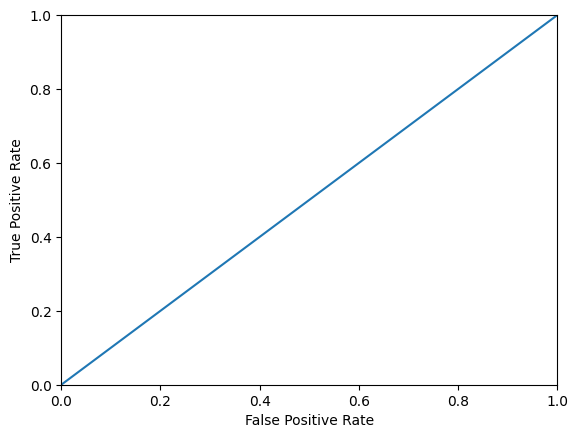

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess your data (replace with your data loading code)
data = pd.read_csv('/content/drive/MyDrive/AI ML/blood-tranfer.csv')
data = data.sample(frac=1).reset_index(drop=True)

X = np.array(data)[:, 1:-1]
Y = np.array(data)[:, -1]

one_hot_encoder = OneHotEncoder(sparse=False)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(Y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 500
batch_size = 32
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy: {}".format(accuracy[1]))

# Predict and evaluate
Y_result = model.predict(X_test)
Y_result = np.argmax(Y_result, axis=1)
Y_test = np.argmax(Y_test, axis=1)

classification_rep = classification_report(Y_test, Y_result)
print("Classification Report:\n", classification_rep)

# Calculate fpr and tpr
fpr, tpr, _ = roc_curve(Y_test, Y_result)

# Plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load your dataset (Assuming it's a CSV file)
data = pd.read_csv('/content/drive/MyDrive/AI ML/blood-tranfer.csv')

# You may want to shuffle your data
data = data.sample(frac=1).reset_index(drop=True)

# Assuming you want to use all columns except the last one as features
X = np.array(data)[:, :-1]

# Assuming the last column is the target
Y = np.array(data)[:, -1]

# Perform one-hot encoding for multi-class classification
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = Y.reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse=False)
Y = onehot_encoder.fit_transform(Y)

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Define your neural network
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def neural_network(X_train, Y_train, X_val=None, Y_val=None, epochs=500, nodes=[11, 8, 5, 5], lr=0.1):
    num_layers = len(nodes)
    layers = [X_train.shape[1]] + nodes + [Y_train.shape[1]]
    weights = initialize_weights(layers)

    for epoch in range(1, epochs + 1):
        weights = train(X_train, Y_train, lr, weights)

        if epoch % 50 == 0:
            print("Epoch {}".format(epoch))
            print("Training Accuracy: {:.2f}%".format(accuracy(X_train, Y_train, weights) * 100))

            if X_val is not None:
                print("Validation Accuracy: {:.2f}%".format(accuracy(X_val, Y_val, weights) * 100))

    return weights

def initialize_weights(layers):
    num_layers = len(layers) - 1
    weights = []

    for i in range(1, num_layers):
        w = np.random.uniform(-1, 1, (layers[i], layers[i - 1] + 1))
        weights.append(np.matrix(w))

    return weights

def forward_propagation(x, weights, layers):
    activations = [x]
    layer_input = x

    for j in range(layers):
        activation = sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)

    return activations

def back_propagation(y, activations, weights, layers, lr):
    output_final = activations[-1]
    error = np.matrix(y - output_final)

    for j in range(layers, 0, -1):
        curr_activation = activations[j]

        if j > 1:
            prev_activation = np.append(1, activations[j - 1])
        else:
            prev_activation = activations[0]

        delta = np.multiply(error, sigmoid_derivative(curr_activation))
        weights[j - 1] += lr * np.multiply(delta.T, prev_activation)
        w = np.delete(weights[j - 1], [0], axis=1)
        error = np.dot(delta, w)

    return weights

def train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x))
        activations = forward_propagation(x, weights, layers)
        weights = back_propagation(y, activations, weights, layers, lr)
    return weights

def predict(item, weights):
    item = np.matrix(np.append(1, item))
    activations = forward_propagation(item, weights, num_layers)
    output_final = activations[-1].A1
    m, index = output_final[0], 0

    for i in range(1, len(output_final)):
        if output_final[i] > m:
            m, index = output_final[i], i

    y = [0] * len(output_final)
    y[index] = 1
    return y

def accuracy(X, Y, weights):
    correct = 0
    for i in range(len(X)):
        x, y = X[i], Y[i]
        guess = predict(x, weights)

        if np.array_equal(y, guess):
            correct += 1

    return correct / len(X)

# Train the neural network
weights = neural_network(X_train, Y_train, X_test, Y_test, epochs=500, nodes=[11, 8, 5, 5], lr=0.1)

print("Testing Accuracy: {:.2f}%".format(accuracy(X_test, Y_test, weights) * 100))

# Evaluate your model
Y_result = []

for x in X_test:
    guess = predict(x, weights)
    Y_result.append(guess)

print("R2 score: {:.2f}".format(r2_score(Y_test, Y_result)))
print(classification_report(Y_test, Y_result))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test.argmax(axis=1), np.array(Y_result).argmax(axis=1))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-70-86acf1745a9b>:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset (Assuming it's a CSV file)
data = pd.read_csv('/content/drive/MyDrive/AI ML/blood-tranfer.csv')

# Select features and target
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Feature scaling (you can customize this part)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define your neural network (you can expand this architecture as needed)
input_dim = X_train.shape[1]
hidden_dim = 10  # Number of neurons in the hidden layer
output_dim = 1  # Binary classification

# Initialize weights and biases
weights_input_hidden = np.random.uniform(size=(input_dim, hidden_dim))
bias_hidden = np.zeros((1, hidden_dim))
weights_hidden_output = np.random.uniform(size=(hidden_dim, output_dim))
bias_output = np.zeros((1, output_dim))

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training parameters
learning_rate = 0.1
epochs = 500

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_layer_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    d_output = output_layer_output - Y_train.reshape(-1, 1)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_output * (1 - hidden_output))

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0)

# Make predictions on the test set
hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)
output_layer_input = np.dot(hidden_output, weights_hidden_output) + bias_output
output_layer_output = sigmoid(output_layer_input)

# Round the output to 0 or 1 for binary classification
predictions = np.round(output_layer_output)

# Calculate accuracy on the test set
accuracy = accuracy_score(Y_test, predictions)
print("Testing Accuracy: {:.2f}%".format(accuracy * 100))

Testing Accuracy: 52.94%
